In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from scipy import ndimage, sparse, linalg
from tqdm import tqdm

from src.utils import seg2bmap, im2double
from src.lrw import generate_seeds, energy_opt

In [2]:
# Base params
nsp = 200 # Num of seed points
thres = 1.35 # Threshold for split
beta = 30 # Gaussian parameter 
alpha = 0.9992 # Lazy parameter
niters_max = 10 # Limit for the number of iterations

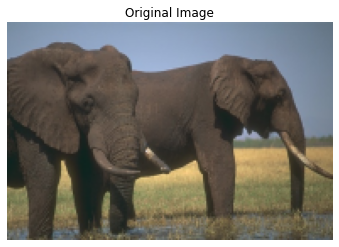

In [3]:
img = cv2.cvtColor(cv2.imread("./images/test.jpg"),cv2.COLOR_BGR2RGB)
scale_percent = 40
width = math.ceil(img.shape[1] * scale_percent / 100)
height = math.ceil(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
gray_img = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2GRAY)
orig_img = img.copy()
img = im2double(img)
X,Y,Z = img.shape
plt.imshow(orig_img)
plt.title("Original Image")
plt.axis('off');

 50%|█████     | 5/10 [00:05<00:06,  1.26s/it]

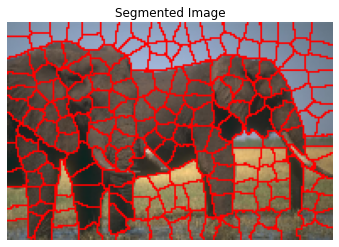

In [4]:
seeds = generate_seeds(nsp, im2double(gray_img/255))
res, seeds, iters = energy_opt(orig_img.copy(), seeds, alpha, nsp, niters_max, beta, thres)
bmap = seg2bmap(res,Y,X)
idx = np.nonzero(bmap>0)

bmap_on_img = orig_img.copy()
if len(bmap_on_img.shape) == 3:
    bmap_on_img[idx[0], idx[1], 0] = 255
    bmap_on_img[idx[0], idx[1], 1] = 0
    bmap_on_img[idx[0], idx[1], 2] = 0
else:
    bmap_on_img[idx[0], idx[1]] = 0

plt.imshow(bmap_on_img)
plt.title("Segmented Image")
plt.axis('off');

Varying seed count

In [ ]:
seed_counts = [50, 100, 150, 200]
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i in tqdm(range(len(seed_counts))):
    seeds = generate_seeds(seed_counts[i], im2double(gray_img/255))
    res, seeds, iters = energy_opt(orig_img.copy(), seeds, alpha, seed_counts[i], niters_max, beta, thres, True)
    bmap = seg2bmap(res, Y, X)
    idx = np.nonzero(bmap > 0)
    bmap_on_img = orig_img.copy()
    if len(bmap_on_img.shape) == 3:
        bmap_on_img[idx[0], idx[1], 0] = 255
        bmap_on_img[idx[0], idx[1], 1] = 0
        bmap_on_img[idx[0], idx[1], 2] = 0
    else:
        bmap_on_img[idx[0], idx[1]] = 0


    axs[i//2, i%2].imshow(bmap_on_img)
    axs[i//2, i%2].title.set_text(f"Seed Count = {seed_counts[i]}")
    axs[i//2, i%2].axis('off');

 25%|██▌       | 1/4 [00:08<00:24,  8.03s/it]

Varying lazy parameter (alpha)

100%|██████████| 4/4 [00:32<00:00,  8.04s/it]


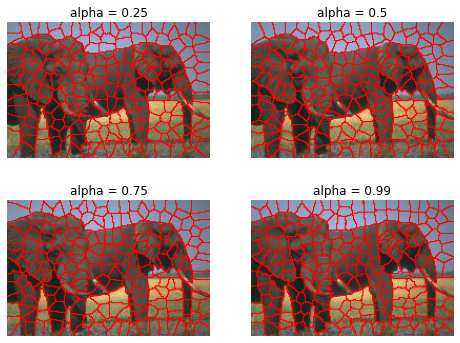

In [6]:
alphas = [0.25, 0.5, 0.75, 0.99]
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i in tqdm(range(len(alphas))):
    seeds = generate_seeds(nsp, im2double(gray_img/255))
    res, seeds, iters = energy_opt(orig_img.copy(), seeds, alphas[i], nsp, niters_max, beta, thres, True)
    bmap = seg2bmap(res, Y, X)
    idx = np.nonzero(bmap > 0)
    bmap_on_img = orig_img.copy()
    if len(bmap_on_img.shape) == 3:
        bmap_on_img[idx[0], idx[1], 0] = 255
        bmap_on_img[idx[0], idx[1], 1] = 0
        bmap_on_img[idx[0], idx[1], 2] = 0
    else:
        bmap_on_img[idx[0], idx[1]] = 0


    axs[i//2, i%2].imshow(bmap_on_img)
    axs[i//2, i%2].title.set_text(f"alpha = {alphas[i]}")
    axs[i//2, i%2].axis('off');

Varying area threshold

100%|██████████| 4/4 [00:40<00:00, 10.04s/it]


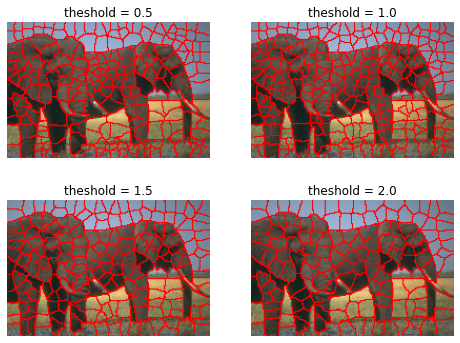

In [7]:
threshs = [0.5, 1.0, 1.5, 2.0]
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i in tqdm(range(len(threshs))):
    seeds = generate_seeds(nsp, im2double(gray_img/255))
    res, seeds, iters = energy_opt(orig_img.copy(), seeds, alpha, nsp, niters_max, beta, threshs[i], True)
    bmap = seg2bmap(res, Y, X)
    idx = np.nonzero(bmap > 0)
    bmap_on_img = orig_img.copy()
    if len(bmap_on_img.shape) == 3:
        bmap_on_img[idx[0], idx[1], 0] = 255
        bmap_on_img[idx[0], idx[1], 1] = 0
        bmap_on_img[idx[0], idx[1], 2] = 0
    else:
        bmap_on_img[idx[0], idx[1]] = 0


    axs[i//2, i%2].imshow(bmap_on_img)
    axs[i//2, i%2].title.set_text(f"theshold = {threshs[i]}")
    axs[i//2, i%2].axis('off');

Varying Gaussian parameter (Beta)

100%|██████████| 4/4 [00:31<00:00,  7.94s/it]


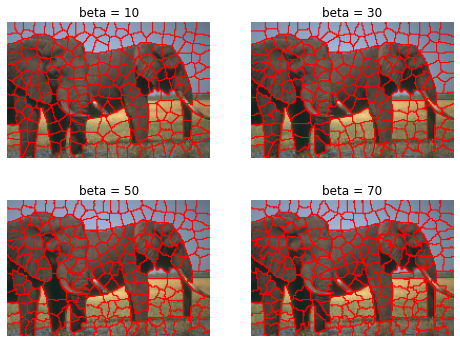

In [9]:
betas = [10, 30, 50, 70]
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i in tqdm(range(len(betas))):
    seeds = generate_seeds(nsp, im2double(gray_img/255))
    res, seeds, iters = energy_opt(orig_img.copy(), seeds, alpha, nsp, niters_max, betas[i], thres, True)
    bmap = seg2bmap(res, Y, X)
    idx = np.nonzero(bmap > 0)
    bmap_on_img = orig_img.copy()
    if len(bmap_on_img.shape) == 3:
        bmap_on_img[idx[0], idx[1], 0] = 255
        bmap_on_img[idx[0], idx[1], 1] = 0
        bmap_on_img[idx[0], idx[1], 2] = 0
    else:
        bmap_on_img[idx[0], idx[1]] = 0


    axs[i//2, i%2].imshow(bmap_on_img)
    axs[i//2, i%2].title.set_text(f"beta = {betas[i]}")
    axs[i//2, i%2].axis('off');